In [194]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.stats import t, describe

In [195]:
# Параметры задания
n = 100  # Размер выборки
q = 1.4  # Коэффициент для расчета вероятности
degrees_of_freedom = 8  # Степени свободы для t-распределения
k = 6

In [196]:
# 1 Генерация выборки из t-распределения
sample = np.random.standard_t(degrees_of_freedom, size=n)
print("Выборка: ", sample)

Выборка:  [-1.33701800e+00 -1.15608457e-01 -5.04126942e-01  2.49189210e-01
 -6.76124500e-01  5.70625276e-01 -3.07230514e-01  1.23458642e+00
  4.79343922e-02 -1.83841154e+00  2.28793392e-01  5.49284526e-02
  8.96095497e-01  1.62802339e+00  6.02593616e-01 -3.10657400e+00
  5.20021993e-01  1.01827956e-01 -1.37428823e-01  5.20911924e-01
 -9.32390774e-03  9.89252951e-01 -8.48220922e-01  5.84321022e-02
  9.10975265e-01 -2.47440335e+00 -8.73331665e-01  3.15293715e-01
 -1.86152733e-01 -5.49750992e-01 -9.30403611e-01 -1.72448518e+00
  4.68898223e-01  5.91398175e-02  1.39270114e+00  1.08104259e+00
 -3.61175899e-01  1.02277885e+00  5.82903938e-01  5.22839219e-01
  1.23195805e+00  1.14203264e+00 -7.85532047e-01 -4.78575318e-01
  8.95356281e-01 -1.39829611e+00 -1.24922028e+00  9.64893337e-01
 -4.78626280e-02 -2.06580982e-01  2.41913659e-01 -1.86647296e-01
 -8.47184166e-01 -4.87847960e-01  8.27258602e-01 -8.70751007e-01
  2.26722266e+00 -1.89605486e+00  3.80911897e-01 -4.01040880e-01
 -1.22227000e-0

In [197]:
# 1.1 Интервальный ряд абсолютных частот
count, bins_edges = np.histogram(sample, bins="sturges")
print("Абсолютные частоты:", count)
print("Границы интервалов:", bins_edges)
print("Сумма абсолютных частот:", sum(count))

Абсолютные частоты: [ 1  1  2  6 19 34 30  7]
Границы интервалов: [-4.8145618  -3.92933874 -3.04411569 -2.15889263 -1.27366957 -0.38844652
  0.49677654  1.3819996   2.26722266]
Сумма абсолютных частот: 100


In [198]:
# 1.2 Интервальный ряд относительных частот
count_rel, bins_edges_rel = np.histogram(sample, bins="sturges", density=True)
interval_width = bins_edges_rel[1] - bins_edges_rel[0]
print("Относительные частоты:", count_rel)
print("Сумма относительных частот:", sum(count_rel * interval_width))
print("Длина интервала абсолютных частот:", interval_width)

Относительные частоты: [0.01129659 0.01129659 0.02259318 0.06777953 0.21463517 0.38408399
 0.33889763 0.07907611]
Сумма относительных частот: 1.0000000000000002
Длина интервала абсолютных частот: 0.8852230570523076


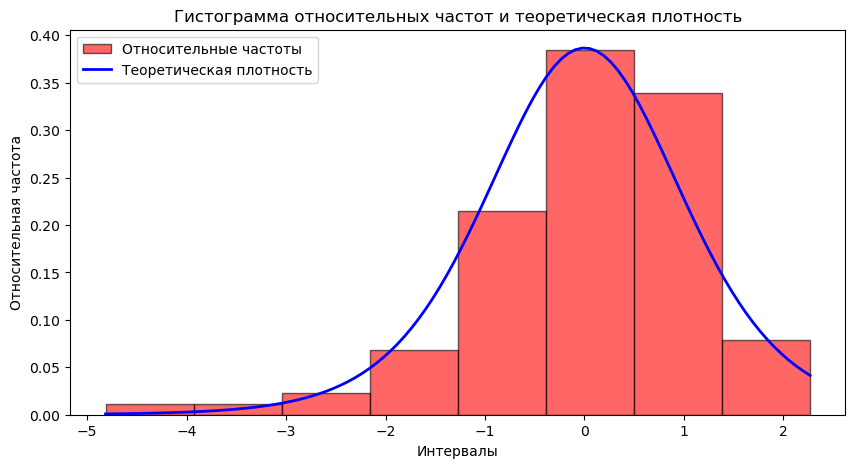

In [199]:
# 2.1 Гистограмма относительных частот и теоретическая плотность
plt.figure(figsize=(10, 5))
plt.hist(sample, bins="sturges", density=True, color="red", edgecolor="black", alpha=0.6, label="Относительные частоты")
x_vals = np.linspace(min(bins_edges), max(bins_edges), 100)
y_vals = t.pdf(x_vals, degrees_of_freedom)
plt.plot(x_vals, y_vals, color="blue", linewidth=2, label="Теоретическая плотность")
plt.title("Гистограмма относительных частот и теоретическая плотность")
plt.xlabel("Интервалы")
plt.ylabel("Относительная частота")
plt.legend()
plt.show()

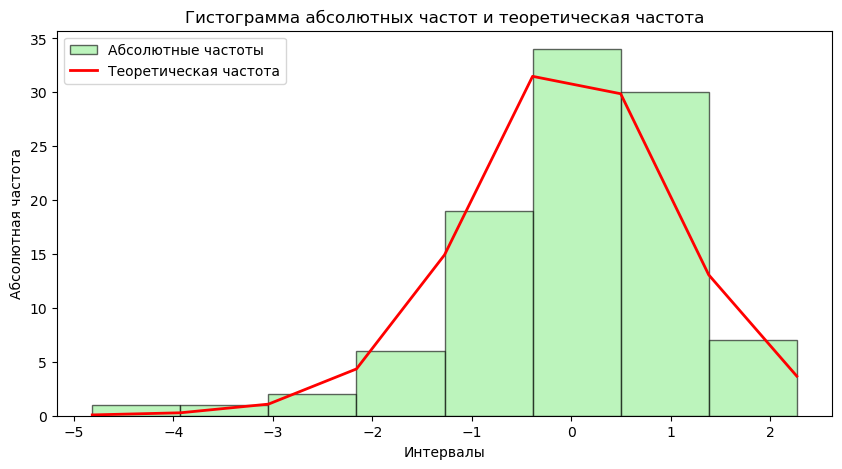

In [200]:
# 2.2 Гистограмма абсолютных частот и теоретическая частота
plt.figure(figsize=(10, 5))
plt.hist(sample, bins="sturges", color="lightgreen", edgecolor="black", alpha=0.6, label="Абсолютные частоты")
avs = t.pdf(bins_edges, degrees_of_freedom) * n * interval_width
plt.plot(bins_edges, avs, color="red", linewidth=2, label="Теоретическая частота")
plt.title("Гистограмма абсолютных частот и теоретическая частота")
plt.xlabel("Интервалы")
plt.ylabel("Абсолютная частота")
plt.legend()
plt.show()

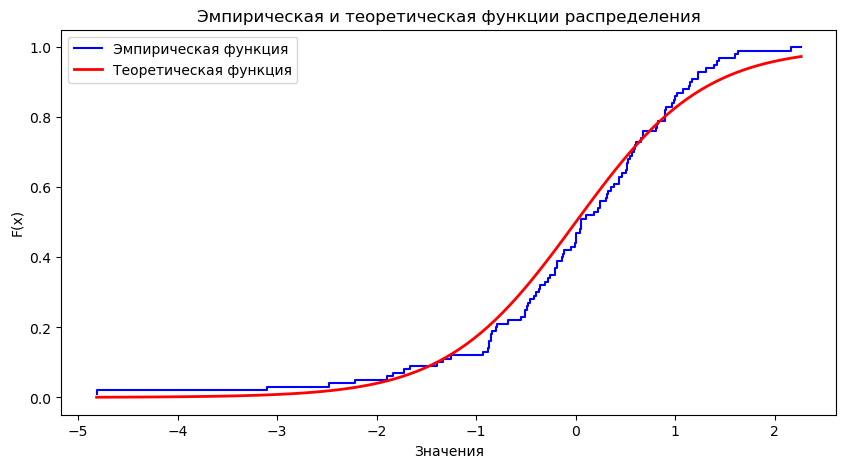

In [201]:

# 2.3 Эмпирическая и теоретическая функции распределения
plt.figure(figsize=(10, 5))
sorted_sample = np.sort(sample)
empirical_cdf = np.arange(1, n+1) / n
plt.step(sorted_sample, empirical_cdf, color="blue", label="Эмпирическая функция")
plt.plot(x_vals, t.cdf(x_vals, degrees_of_freedom), color="red", linewidth=2, label="Теоретическая функция")
plt.title("Эмпирическая и теоретическая функции распределения")
plt.xlabel("Значения")
plt.ylabel("F(x)")
plt.legend()
plt.show()

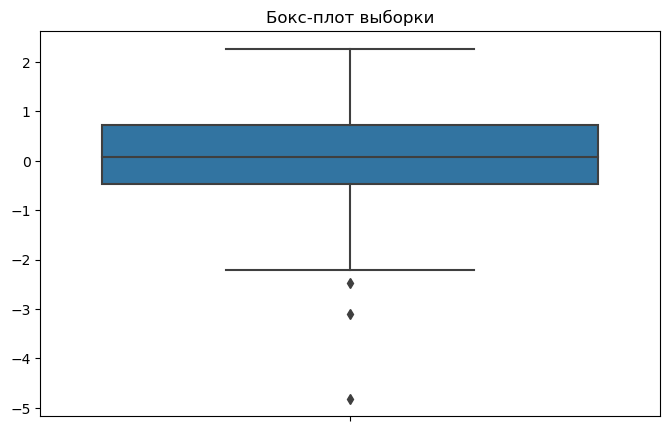

In [202]:
# 2.4 Бокс-плот выборки
plt.figure(figsize=(8, 5))
sb.boxplot(y=sample)
plt.title("Бокс-плот выборки")
plt.show()

In [203]:
iqr = np.percentile(sample, 75) - np.percentile(sample, 25)
lower_bound = np.percentile(sample, 25) - 1.5 * iqr
upper_bound = np.percentile(sample, 75) + 1.5 * iqr
theoretical_outliers = sum((sample < lower_bound) | (sample > upper_bound))
print("Число выбросов:", theoretical_outliers)
print("Теоретическое число выбросов ПРИ НОРМАЛЬНОМ РАСПРЕДЕЛЕНИИ ", 0.05*n)

Число выбросов: 3
Теоретическое число выбросов ПРИ НОРМАЛЬНОМ РАСПРЕДЕЛЕНИИ  5.0


In [204]:
# 3. Ответы на вопросы
interval_start = bins_edges[k-1]
interval_end = bins_edges[k]

# Оценка вероятности попадания в k-й интервал
probability_in_kth_interval = (count[k-1] * (interval_end - interval_start))
print(f"Оценка вероятности попадания значений в {k}-й интервал: {probability_in_kth_interval}")

theoretical_probability_in_kth_interval = t.cdf(interval_end, degrees_of_freedom) - t.cdf(interval_start, degrees_of_freedom)
print(f"Теоретическая вероятность попадания значений в {k}-й интервал: {theoretical_probability_in_kth_interval}")


Оценка вероятности попадания значений в 6-й интервал: 30.09758393977846
Теоретическая вероятность попадания значений в 6-й интервал: 0.3297362839644382


In [205]:
# 4. Расчет вероятности P(*)
p_theoretical = t.cdf(q*np.sqrt(degrees_of_freedom/(degrees_of_freedom-2)), degrees_of_freedom) - t.cdf(-q*np.sqrt(degrees_of_freedom/(degrees_of_freedom-2)), degrees_of_freedom)
print("Теоретическая вероятность P(*) по формуле:", p_theoretical)

count_in_interval = np.sum((sample >= -q*np.sqrt(degrees_of_freedom/(degrees_of_freedom-2))) & (sample <= q*np.sqrt(degrees_of_freedom/(degrees_of_freedom-2))))
estimated_probability = count_in_interval / n
print(f"Оценка вероятности по выборке для n={n}: {estimated_probability}")

# 4.3 Увеличение объема выборки
large_sample = np.random.standard_t(degrees_of_freedom, size=50 * n)
count_in_interval_large = np.sum((large_sample >= -q*np.sqrt(degrees_of_freedom/(degrees_of_freedom-2))) & (large_sample <= q*np.sqrt(degrees_of_freedom/(degrees_of_freedom-2))))
estimated_probability_large = count_in_interval_large / (50*n)

print(f"Оценка вероятности по выборке для n={50*n}: {estimated_probability_large}")


Теоретическая вероятность P(*) по формуле: 0.8553689888452527
Оценка вероятности по выборке для n=100: 0.89
Оценка вероятности по выборке для n=5000: 0.8538


In [206]:
# 5. Точечные оценки параметров распределения
mean_estimate = np.mean(sample)
median_estimate = np.median(sample)
variance_estimate = np.var(sample, ddof=1)
std_dev_estimate = np.std(sample, ddof=1)
skewness_estimate = ((sample - mean_estimate) ** 3).mean() / (std_dev_estimate ** 3)
kurtosis_estimate = ((sample - mean_estimate) ** 4).mean() / (std_dev_estimate ** 4) - 3


In [207]:
print("Оценка мат. ожидания: ", mean_estimate)
print("Медиана: ", median_estimate)
print("Дисперсия:", variance_estimate)
print("Стандартное отклонение:", std_dev_estimate)
print("Асимметрия:", skewness_estimate)
print("Эксцесс:", kurtosis_estimate)

Оценка мат. ожидания:  0.028290552752623127
Медиана:  0.08048388655839679
Дисперсия: 1.182406427006283
Стандартное отклонение: 1.0873851327870374
Асимметрия: -1.1842935391533649
Эксцесс: 3.16811306760912


In [208]:
# Использование scipy для проверки результатов
desc_stats = describe(sample)
print("Результаты describe():")
print("Оценка мат. ожидания:", desc_stats.mean)
print("Дисперсия:", desc_stats.variance)
print("Асимметрия:", desc_stats.skewness)
print("Эксцесс:", desc_stats.kurtosis)

Результаты describe():
Оценка мат. ожидания: 0.028290552752623127
Дисперсия: 1.182406427006283
Асимметрия: -1.2022826173902
Эксцесс: 3.2933507474840518


In [209]:
# Повторное вычисление с увеличенной выборкой
large_mean_estimate = np.mean(large_sample)
large_median_estimate = np.median(large_sample)
large_variance_estimate = np.var(large_sample, ddof=1)
large_skewness_estimate = ((large_sample - large_mean_estimate) ** 3).mean() / np.std(large_sample)**3
large_kurtosis_estimate = ((large_sample - large_mean_estimate) ** 4).mean() / np.std(large_sample)**4 - 3


In [210]:
print("Оценки для увеличенной выборки:")
print("Оценка мат. ожидания:", large_mean_estimate)
print("Медиана: ", large_median_estimate)
print("Дисперсия:", large_variance_estimate)
print("Ассиметрия:", large_skewness_estimate)
print("Эксцесс:", large_kurtosis_estimate)

Оценки для увеличенной выборки:
Оценка мат. ожидания: 0.016535994172517565
Медиана:  0.02101160973077
Дисперсия: 1.34942158232062
Ассиметрия: -0.06905289402867047
Эксцесс: 1.1442963219360216
